In [19]:
# Comparison between simulation of Geometric Brownian Motion as in https://quantpy.com.au/stochastic-calculus/simulating-geometric-brownian-motion-gbm-in-python/
# and deterministic averaged approximations used in the paper LU, Yujie; ZHANG, Nan; CHEN, Jiayu. A behavior-based decision-making model for energy performance contracting in building retrofit. Energy and Buildings, 2017, 156: 315-326
import numpy as np
import matplotlib.pyplot as plt
import copy

In [20]:
params = {
    'IC': 3840000,
    'G': 250000, 
    'theta': 0.8,
    'n': 15,
    'phi': 0.5,
    'sigma_H': 0.25, 
    'sigma_K': 0.01, 
    'alpha_E': 0.0523,
    'sigma_E': 0.0856,
    'delta': 1.025,
    'H0': 0.0036,
    'K0': 0.43,
    'PE0': 0.24,
    'N': 25,
    'alpha': 0.05,
    'beta': 0.2,
    'r0': 0.031,
    'rR': 0.031,
    'rP': 0.031,
    'rE': 0.06,
    'rho': -20,
    'eps_H': 0.01,
    'eps_P': 0.01,
    'eps_K': 0.01
    }

In [21]:
def GBM(S0, mu, sigma, eps, T, n_time, N_sim):
    # calc each time step
    dt = T/n_time
    # simulation using numpy arrays
    St = np.exp((mu - sigma ** 2 / 2) * dt + sigma * eps * np.random.normal(0, np.sqrt(dt), size=(N_sim,n_time)).T)
    # Define time interval correctly 
    time = np.linspace(0,T,n_time+1)
    tt = np.full(shape=(N_sim,n_time+1), fill_value=time).T
    # include array of 1's
    St = np.vstack([np.ones(N_sim), St])
    # multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
    St = S0 * St.cumprod(axis=0)
    return tt, St

In [22]:
IC = params['IC']
sigma_H = params['sigma_H']
sigma_K = params['sigma_K']
alpha_E = params['alpha_E']
sigma_E = params['sigma_E']
delta = params['delta']
H0 = params['H0']
K0 = params['K0']
PE0 = params['PE0']
N = params['N']
alpha = params['alpha']
beta = params['beta']
r0 = params['r0']
rR = params['rR']
rP = params['rP']
rE = params['rE']
rho = params['rho']
eps_H = params['eps_H']
eps_P = params['eps_P']
eps_K = params['eps_K']
phi = params['phi']
theta = params['theta']
n = params['n']
G = params['G']
t = np.arange(N+1)

[[13824.        ]
 [13450.76026946]
 [13049.24272513]
 [12647.83556927]
 [12311.08686741]
 [11888.74811277]
 [11502.58432983]
 [11170.43413859]
 [10831.06682157]
 [10464.46822915]
 [10136.54019676]
 [ 9820.18355103]
 [ 9534.32559143]
 [ 9216.87548025]
 [ 8898.45064679]
 [ 8628.5176022 ]
 [ 8356.26842442]
 [ 8100.25238189]
 [ 7907.19760073]
 [ 7652.7768825 ]
 [ 7417.27666595]
 [ 7199.66619263]
 [ 6972.9780894 ]
 [ 6725.15912879]
 [ 6514.2641774 ]
 [ 6295.43924372]]


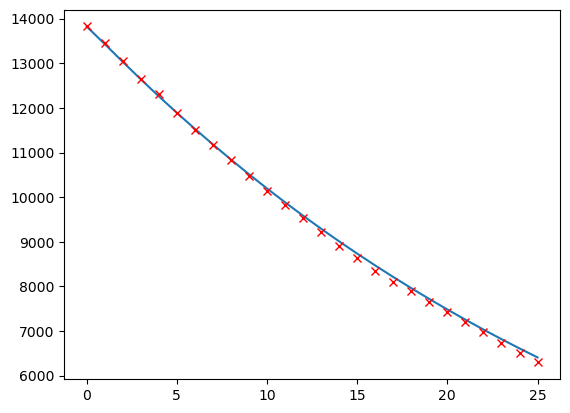

In [23]:
# test H
H = IC*H0*np.exp((-np.square(sigma_H)*t/2)+(sigma_H*eps_H*np.sqrt(t)))
plt.plot(t, H)
tt, Hr = GBM(IC*H0, 0, sigma_H, eps_H, N, N, 1)
plt.plot(t, Hr, 'rx')
print(Hr)

[[0.24      ]
 [0.25210135]
 [0.26486191]
 [0.27793072]
 [0.29197715]
 [0.30677188]
 [0.32217731]
 [0.33817742]
 [0.35506912]
 [0.37236461]
 [0.39119597]
 [0.41039997]
 [0.43143657]
 [0.45304025]
 [0.47605413]
 [0.50013916]
 [0.52474275]
 [0.55013587]
 [0.57759855]
 [0.60573363]
 [0.63480045]
 [0.66682807]
 [0.70059654]
 [0.73519121]
 [0.77203824]
 [0.80990958]]


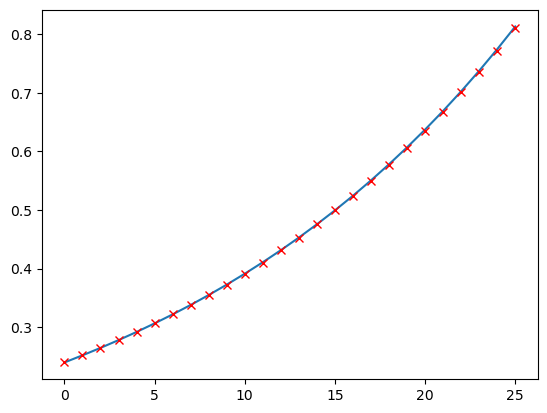

In [24]:
# test PE
PE = PE0*np.exp((alpha_E-(np.square(sigma_E)/2))*t+sigma_E*eps_P*np.sqrt(t))
plt.plot(t, PE)
tt, PEr = GBM(PE0, alpha_E, sigma_E, eps_P, N, N, 1)
plt.plot(t, PEr, 'rx')
print(PEr)

[[1651200.        ]
 [1651139.23161281]
 [1651035.3946154 ]
 [1650956.88148583]
 [1650881.06373849]
 [1650781.55989304]
 [1650674.61639764]
 [1650608.16511225]
 [1650538.67739633]
 [1650453.78871334]
 [1650389.22523412]
 [1650297.48962165]
 [1650195.59204612]
 [1650129.58128024]
 [1650027.52809551]
 [1649964.75102469]
 [1649869.52927136]
 [1649806.18296402]
 [1649752.102617  ]
 [1649674.08977012]
 [1649583.96518976]
 [1649501.35027612]
 [1649442.02352025]
 [1649366.61265548]
 [1649297.50781547]
 [1649212.50075996]]


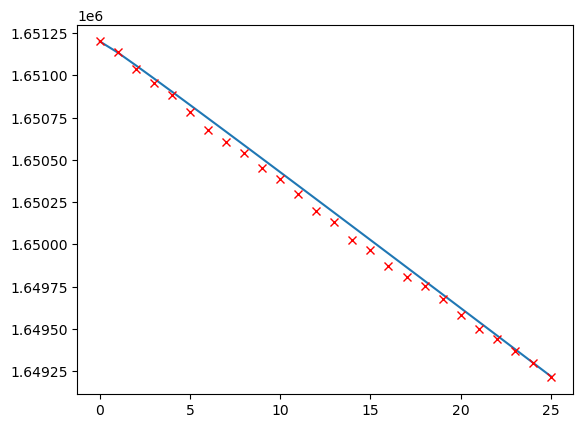

In [25]:
eps_K = 0.001
K = IC*K0*np.exp((-np.square(sigma_K)*t/2)+(sigma_K*eps_K*np.sqrt(t)))
plt.plot(t, K)
tt, Kr = GBM(IC*K0, 0, sigma_K, eps_K, N, N, 1)
plt.plot(t, Kr, 'rx')
print(Kr)